In [1]:
# Rosenbrock
# In the paper Ngen=3000  NPAR=100 dim=30
# JADE: Adaptive Differential Evolution with Optional External Archive

In [2]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=3000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100 # NUMBER OF PARTICLES
mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão

#TOTAL=ITE

############################### Função
dim=30

#fchoice='Rastrigin' #fchoice='Michalewicz' #fchoice='Schwefel'
fchoice='Rosenbrock'
Fun=Function.Rosenbrock

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS


In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [4]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [5]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [6]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [7]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [8]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [9]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [10]:
#TOTAL=7*dim*its*ITE
TOTAL=10*dim*its*ITE
#TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR



dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
for i in range(rodadas):
  SOMA=0
  pop = np.random.rand(NPAR, dimensions)
  diff=np.zeros(PAR)
  for ii in range(PAR):
    diff[ii] = MAX[ii]-MIN[ii]
  X = MIN + pop * diff
    
  PONTOS=ITE # DIVISOES DA POPULACAO

 




In [11]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for i in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    SOMAf=0
    
    start_ite = time.time()
    delta_time=(start_ite-start_time)/60
    
    
    
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    for ii in range(PAR):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
    Xf = MIN + pop * diff
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X])

    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X,Fitness)
    nrow,ncol=X.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1

    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
     

      
      MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]

      Fitness = np.asarray([Fun(ind) for ind in X])
      Maior=np.argmax(Fitness)
      Menor=np.argmin(Fitness)

    print('ite=',i,'total=50','time=',delta_time,'Fbest',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

ite= 0 total=50 time= 3.345012664794922e-05 Fbest 0.159577576356
ite= 1 total=50 time= 15.02742304801941 Fbest 2.17167499534
ite= 2 total=50 time= 30.122659516334533 Fbest 0.222162563957
ite= 3 total=50 time= 45.31777657270432 Fbest 0.061312203044
ite= 4 total=50 time= 60.20471189816793 Fbest 0.0336127840956
ite= 5 total=50 time= 74.71924764315287 Fbest 0.0945404261275
ite= 6 total=50 time= 89.28967329263688 Fbest 0.136811344708
ite= 7 total=50 time= 104.30055189530054 Fbest 0.0925966395615
ite= 8 total=50 time= 118.62058191696802 Fbest 0.0755094989856
ite= 9 total=50 time= 132.9516073067983 Fbest 1.40459405886
ite= 10 total=50 time= 147.27620904048283 Fbest 0.107664683031
ite= 11 total=50 time= 161.5988754550616 Fbest 0.219097980356
ite= 12 total=50 time= 176.1235893090566 Fbest 0.125388427559
ite= 13 total=50 time= 190.439502398173 Fbest 3.42667249322
ite= 14 total=50 time= 204.73514975706738 Fbest 0.131365080751
ite= 15 total=50 time= 219.11755474011105 Fbest 0.634652665347
ite= 16 

In [12]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [13]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0            91.831685     0.986019  0.000111         0.0      0.0  100.0   
1            89.657829     0.962678  0.000222         1.0      2.0  100.0   
2            87.713283     0.941799  0.000333         1.0      2.0  100.0   
3            86.184801     0.925387  0.000444         0.0      0.0  100.0   
4            84.799471     0.910513  0.000556         1.0      2.0  100.0   
5            83.954458     0.901439  0.000667         0.0      0.0  100.0   
6            82.372635     0.884455  0.000778         0.0      0.0  100.0   
7            81.114132     0.870942  0.000889         0.0      0.0  100.0   
8            80.292501     0.862120  0.001000         1.0      2.0  100.0   
9            78.960583     0.847819  0.001111         1.0      2.0  100.0   
10           77.906476     0.836501  0.001222         1.0      2.0  100.0   
11           76.982317     0.826578  0.001333         0.0      0.0  100.0   

In [14]:
print(NPAR)

100


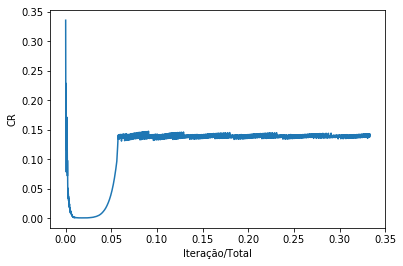

In [15]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

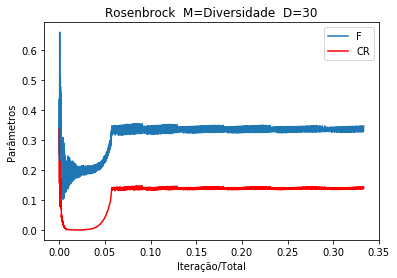

In [16]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


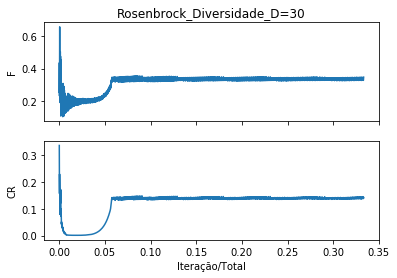

In [17]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [18]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)


DE_POP_VAR_F_CR TOTAL= 900000 Iterações= 3000 Dim= 30 Min/Max= -30 / 30 _ Rosenbrock
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-30_Interv-3000 

MÉDIA:  0.421895853827
MIN __: 0.00626204859425
MAX__:  3.42667249322
STD __: 0.597376128274
Tempo Médio= 885.723 segundos ---
50 Rodadas

BEST:  [ 0.99991856  0.99987257  0.99989699  0.99988132  0.9998539   0.99986341
  0.99979605  0.99984148  0.99979403  0.9997955   0.99980613  0.99989631
  0.99989446  0.99986106  0.99982844  0.99983427  0.99993564  1.00008721
  1.000024    0.9999886   0.99998903  1.00011232  0.99946755  0.99840942
  0.99648477  0.9926417   0.98927073  0.97921735  0.9571681   0.91194883
  0.00626205]


In [19]:
print(pd.DataFrame(XY))

          0         1         2         3         4         5         6   \
0   0.999815  0.999841  0.999841  0.999823  0.999774  0.999769  0.999842   
1   0.999954  0.999881  0.999836  0.999779  0.999774  0.999743  0.999760   
2   0.999909  0.999830  0.999843  0.999786  0.999784  0.999802  0.999683   
3   0.999872  0.999770  0.999848  0.999769  0.999764  0.999758  0.999729   
4   0.999861  0.999775  0.999806  0.999770  0.999792  0.999786  0.999814   
5   0.999896  0.999837  0.999815  0.999827  0.999821  0.999761  0.999691   
6   0.999858  0.999797  0.999929  0.999882  0.999819  0.999726  0.999830   
7   0.999852  0.999794  0.999831  0.999823  0.999913  0.999780  0.999756   
8   0.999845  0.999870  0.999740  0.999865  0.999763  0.999684  0.999674   
9   0.999862  0.999874  0.999752  0.999762  0.999778  0.999727  0.999725   
10  0.999961  0.999862  0.999799  0.999831  0.999775  0.999784  0.999735   
11  0.999849  0.999849  0.999870  0.999841  0.999747  0.999729  0.999678   
12  0.999888

In [20]:
print(X)

[[  0.99991434   0.99979497   0.99990046 ...,   1.86314266   3.48333115
   12.11789065]
 [  0.99991331   0.99979233   0.99971697 ...,   1.74831761   3.072914
    9.45151652]
 [  0.99986109   0.99981663   0.99987251 ...,   1.53952417   2.32282227
    5.37620951]
 ..., 
 [  0.99991235   0.99986377   0.99985455 ...,   1.56467247   2.43994376
    5.98153203]
 [  0.9998685    0.9998028    0.99984439 ...,   1.36388136   1.84448289
    3.36934355]
 [  0.99987499   0.99982062   0.99976594 ...,   2.21372394   4.81822139
   23.22015527]]
